Hill Climbing
=======

# Theory

## Definition


## Examples


# Implementation


## Imports

In [3]:
import math
import matplotlib
import numpy as np
import pandas as pd
from typing import Callable
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
matplotlib.rcParams['animation.embed_limit'] = 2**128

## Parameters

In [4]:
# No general Parameters

## Algorithm


In [50]:
def HC(cost_func: Callable, get_neighborhood: Callable, x_0: float, maxiter: int = int(5e3), task: str = "minimization") -> tuple[float, list, int]:


    # algorithm data
    x = [x_0]
    cost = [cost_func(x_0)]

    for _ in range(maxiter-1):
        
        # select the best neighbor
        neighbors = get_neighborhood(x[-1])
        neighbors_costs = np.array([cost_func(neighbor) for neighbor in neighbors])
        best_neighbor = neighbors[ neighbors_costs.argsort()[0] ]

        # accept if neighbor is better
        if cost_func(best_neighbor) < cost_func(x[-1]):
            x.append(best_neighbor)
            cost.append(cost_func(best_neighbor))

        # terminate if neighbor is worse
        if cost_func(best_neighbor) > cost_func(x[-1]):
            break
        
    
    x_optimal, moves, history= x[-1], len(x), pd.DataFrame({"cost": cost, "x": x})

    return x_optimal, moves, history

## Results Visualization

### Optima of Mathematical Function

In [51]:
# cost function and neighborhood definition
def cost_func(x: float) -> float:
    '''
    The cost is calculated use a mathematical expression "i.e. the mathematical function to be optimized"
    '''
    return 30*np.sin(x) + x**2

def get_neighborhood(x: float) -> np.array:
    '''
    The neighborhood around x is defined as the list of numbers that is close to x within a given range "i.e.
    an interval around x => [x-5, x+5]". Note that x is excluded from this list.
    '''
    interval_around_x = np.linspace(x-0.1, x+0.1) 
    return interval_around_x[ interval_around_x != x ]

# starting value search
x_0 = 8

In [52]:
x_optimal, moves, history = HC(cost_func=cost_func,
                               get_neighborhood=get_neighborhood,
                               x_0=x_0
                               )

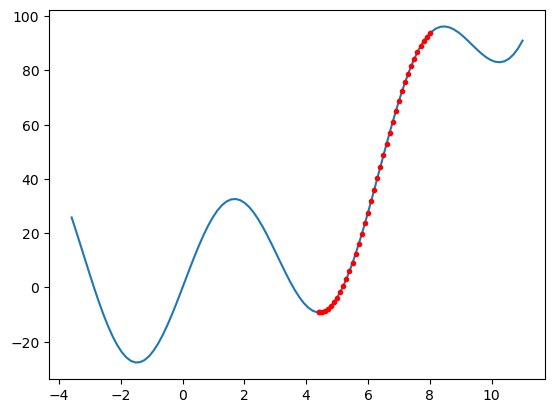

In [53]:
xx = np.linspace(history["x"].min()-8, history["x"].max()+3, num=100)

plt.plot(xx, cost_func(xx))
plt.plot(history["x"], history["cost"], 'r.')

### N-Queens Problem

In [62]:
def cost_function(queens):
    '''
    _summary_
    '''

    # collect queens position index, index in vertical and right/left diagonal lines
    vertical_positions = queens
    right_diagonal_positions = -1*( 1*queens - np.arange(len(queens))*-1 )
    left_diagonal_positions  = -1*( -1*queens - np.arange(len(queens))*-1 )
    
    # check for attacks, by checking if they share same position index
    cost = 0
    for queen_positions in [vertical_positions, right_diagonal_positions, left_diagonal_positions]:
        _, counts = np.unique(queen_positions, return_counts=True)
        if any(counts > 1):
           cost += sum([math.comb(queens_same_axis, 2) for queens_same_axis in counts[counts > 1]])
    
    return cost

def get_neighborhood(queens):
    '''
    _summary_
    '''

    N = len(queens)
    neighborhood = []
    for i in range(N):
        
        for factor in [1,2]:
            # shift a queen to right and left
            shift = factor*np.eye(1,N, k=i).reshape((N))
            neighbor1 = queens + shift
            neighbor2 = queens - shift

            # test validity of neighbors
            if np.all(neighbor1 <= N-1):
                neighborhood.append(neighbor1)

            if np.all(neighbor2 >= 0):
                neighborhood.append(neighbor2)
      
    return np.array(neighborhood)

def print_board(ax, queens):
    N = len(queens)
    board = np.zeros((N,N,3))
    board += 0.5 # "Black" color. Can also be a sequence of r,g,b with values 0-1.
    board[::2, ::2] = 1 # "White" color
    board[1::2, 1::2] = 1 # "White" color

    fig, ax = plt.subplots()
    ax.imshow(board, interpolation='nearest')

    for y, x in enumerate(queens):
        # Use "family='font name'" to change the font
        ax.text(x, y, u'\u2655', size=30, ha='center', va='center')

    ax.set(xticks=[], yticks=[])
    ax.axis('image')

# search starting value
queens_0 = np.random.choice(range(4), size=4)

In [63]:
x_optimal, moves, history = HC(cost_func=cost_function,
                               get_neighborhood=get_neighborhood,
                               x_0=queens_0
                               )

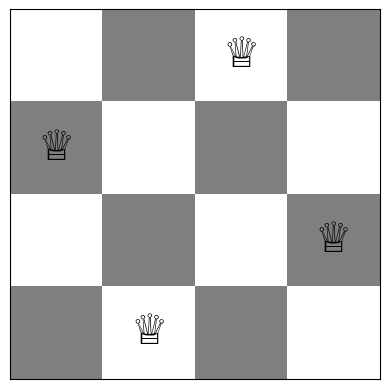

In [64]:
print_board(0, x_optimal)